# PROCESO EDA OULAD

## Preparacion de Ambiente

In [114]:
# pip install pymysql
3!pip install seaborn


In [182]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Inicializando Base de Datos

In [17]:
server = 'localhost'
database = 'oulad'
username = 'root'
password = 'root'
port = 3306

connection_string = f"mysql+pymysql://{username}:{password}@{server}:{port}/{database}"
engine = create_engine(connection_string)

print("Connection successful.")

Connection successful.


In [19]:
dwh_server = 'localhost'
dwh_database = 'sakila_dwh'
dwh_username = 'root'
dwh_password = 'root'
dwh_port = 5432

dwh_connection_string = f"postgresql+psycopg2://{dwh_username}:{dwh_password}@{dwh_server}:{dwh_port}/{dwh_database}"
dwh_engine = create_engine(dwh_connection_string)

print("Connection successful.")

Connection successful.


### Cargando Archivos

In [98]:
assessments_df = pd.read_csv('anonymisedData/assessments.csv')
courses_df = pd.read_csv('anonymisedData/courses.csv')
studentAssessment_df = pd.read_csv('anonymisedData/studentAssessment.csv')
studentInfo_df = pd.read_csv('anonymisedData/studentInfo.csv')
studentRegistration_df = pd.read_csv('anonymisedData/studentRegistration.csv')
studentVle_df = pd.read_csv('anonymisedData/studentVle.csv')
vle_df = pd.read_csv('anonymisedData/vle.csv')

### Cargando Staging

In [123]:
assessments_df.to_sql('assessments', con=engine, if_exists='replace', index=False)

206

In [125]:
courses_df.to_sql('courses', con=engine, if_exists='replace', index=False)

22

In [127]:
studentAssessment_df.to_sql('studentAssessment', con=engine, if_exists='replace', index=False)

173912

In [129]:
studentInfo_df.to_sql('studentInfo', con=engine, if_exists='replace', index=False)

32593

In [130]:
studentRegistration_df.to_sql('studentRegistration', con=engine, if_exists='replace', index=False)

32593

In [131]:
studentVle_df.to_sql('studentVle', con=engine, if_exists='replace', index=False)

10655280

In [134]:
vle_df.to_sql('vle', con=engine, if_exists='replace', index=False)

6364

In [7]:
studentinfo_ord_df = pd.read_sql('SELECT * FROM vw_studentinfo_ord_final', engine)

In [9]:
studentVle_df = pd.read_sql('SELECT * FROM vw_studentVle', engine)

In [11]:
studentAssessment_df = pd.read_sql('SELECT * FROM vw_studentAssessment', engine)

In [25]:
studentAssessment_t_df = pd.read_sql('SELECT * FROM studentAssessment', engine)
assessments_t_df = pd.read_sql('SELECT * FROM assessments', engine)
studentInfo_t_df = pd.read_sql('SELECT * FROM studentInfo', engine)
studentVle_t_df = pd.read_sql('SELECT * FROM studentVle', engine)
courses_t_df = pd.read_sql('SELECT * FROM courses', engine)



In [23]:
studentinfo_ord_df.to_sql(name='stg_studentinfo_ord',con=dwh_engine,schema='staging',if_exists='replace', index=False)
studentVle_df.to_sql(name='stg_studentVle',con=dwh_engine,schema='staging',if_exists='replace', index=False)
studentAssessment_df.to_sql(name='stg_studentAssessment',con=dwh_engine,schema='staging',if_exists='replace', index=False)

319

In [27]:
studentAssessment_t_df.to_sql(name='stg_fact_studentAssessment',con=dwh_engine,schema='staging',if_exists='replace', index=False)
assessments_t_df.to_sql(name='stg_dim_assessments',con=dwh_engine,schema='staging',if_exists='replace', index=False)
studentInfo_t_df.to_sql(name='stg_dim_studentInfo',con=dwh_engine,schema='staging',if_exists='replace', index=False)
studentVle_t_df.to_sql(name='stg_fact_studentVle',con=dwh_engine,schema='staging',if_exists='replace', index=False)
courses_t_df.to_sql(name='stg_dim_courses',con=dwh_engine,schema='staging',if_exists='replace', index=False)

22

## PROCESO EDA

### Cargando Recursos

In [31]:
fact_studentVle_df = pd.read_sql('SELECT * FROM dwh.fact_studentVle', dwh_engine)
fact_studentAssessment_df = pd.read_sql('SELECT * FROM dwh.fact_studentAssessment', dwh_engine)
reporte_studentAssessment_df = pd.read_sql('SELECT * FROM dwh.reporte_studentAssessment', dwh_engine)
reporte_studentVle_df = pd.read_sql('SELECT * FROM dwh.reporte_studentVle', dwh_engine)
reporte_studentinfo_ord_df = pd.read_sql('SELECT * FROM dwh.reporte_studentinfo_ord', dwh_engine)

### Revision de Recursos

#### StudentVle

In [128]:
fact_studentVle_columns = fact_studentVle_df.columns.tolist()
print(f'fact_studentVle: {fact_studentVle_df.shape}\n')
print(f'columnas: {fact_studentVle_columns}\n')
fact_studentVle_df.info()
fact_studentVle_df.describe()

fact_studentVle: (10655280, 8)

columnas: ['id', 'fecha_carga', 'code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   fecha_carga        object
 2   code_module        object
 3   code_presentation  object
 4   id_student         object
 5   id_site            object
 6   date               object
 7   sum_click          object
dtypes: int64(1), object(7)
memory usage: 650.3+ MB


,id
count,1.065528e+07
mean,5.327640e+06
std,3.075915e+06
min,1.000000e+00
25%,2.663821e+06
50%,5.327640e+06
75%,7.991460e+06
max,1.065528e+07


#### StudentAssessment

In [150]:
fact_studentAssessment_columns = fact_studentAssessment_df.columns.tolist()
print(f'fact_studentAssessment: {fact_studentAssessment_df.shape}\n')
print(f'columnas: {fact_studentAssessment_columns}\n')
fact_studentAssessment_df.info()
fact_studentAssessment_df.describe()

fact_studentAssessment: (173912, 7)

columnas: ['id', 'fecha_carga', 'id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              173912 non-null  int64 
 1   fecha_carga     173912 non-null  object
 2   id_assessment   173912 non-null  object
 3   id_student      173912 non-null  object
 4   date_submitted  173912 non-null  object
 5   is_banked       173912 non-null  object
 6   score           173912 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.3+ MB


,id
count,173912.000000
mean,87172.500000
std,50204.214345
min,217.000000
25%,43694.750000
50%,87172.500000
75%,130650.250000
max,174128.000000


#### Reporte StudentAssessment

In [132]:
reporte_studentAssessment_columns = reporte_studentAssessment_df.columns.tolist()
print(f'reporte_studentAssessment: {reporte_studentAssessment_df.shape}\n')
print(f'columnas: {reporte_studentAssessment_columns}\n')

reporte_studentAssessment_df.info()
reporte_studentAssessment_df.describe()

reporte_studentAssessment: (207319, 21)

columnas: ['id', 'fecha_carga', 'id_assessment', 'code_presentation', 'assessment_type', 'date', 'weight', 'code_module', 'date_submitted', 'is_banked', 'score', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207319 entries, 0 to 207318
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    207319 non-null  int64 
 1   fecha_carga           207319 non-null  object
 2   id_assessment         207319 non-null  object
 3   code_presentation     207319 non-null  object
 4   assessment_type       207319 non-null  object
 5   date                  207319 non-null  object
 6   weight                207319 non-null  object
 7   code_module           207319 non-null  object
 8   date_submitted    

,id
count,207319.000000
mean,313993.000000
std,59847.984566
min,210334.000000
25%,262163.500000
50%,313993.000000
75%,365822.500000
max,417652.000000


#### Reporte StudentVle

In [134]:
reporte_studentVle_columns = reporte_studentVle_df.columns.tolist()
print(f'reporte_studentVle: {reporte_studentVle_df.shape}\n')
print(f'columnas: {reporte_studentVle_columns}\n')
reporte_studentVle_df.info()
reporte_studentVle_df.describe()


reporte_studentVle: (13006575, 17)

columnas: ['id', 'fecha_carga', 'code_module', 'code_presentation', 'id_site', 'date', 'sum_click', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13006575 entries, 0 to 13006574
Data columns (total 17 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    int64 
 1   fecha_carga           object
 2   code_module           object
 3   code_presentation     object
 4   id_site               object
 5   date                  object
 6   sum_click             object
 7   id_student            object
 8   gender                object
 9   region                object
 10  highest_education     object
 11  imd_band              object
 12  age_band              object
 13  num_of_prev_attempts  object
 14  studied_credits       object
 15  disability   

,id
count,1.300658e+07
mean,1.951000e+07
std,3.754675e+06
min,1.300671e+07
25%,1.625836e+07
50%,1.951000e+07
75%,2.276164e+07
max,2.601329e+07


#### Reporte Studentinfo_ord

In [136]:
reporte_studentinfo_ord_columns = reporte_studentinfo_ord_df.columns.tolist()
print(f'reporte_studentinfo_ord_df: {reporte_studentinfo_ord_df.shape}\n')
print(f'\ncolumnas: {reporte_studentinfo_ord_columns}\n')
reporte_studentinfo_ord_df.info()
reporte_studentinfo_ord_df.describe()


reporte_studentinfo_ord_df: (32593, 20)


columnas: ['id', 'fecha_carga', 'code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'ord_gender', 'ord_region', 'ord_imd_band', 'ord_highest_education', 'ord_final_result', 'ord_age_band']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     32593 non-null  int64 
 1   fecha_carga            32593 non-null  object
 2   code_module            32593 non-null  object
 3   code_presentation      32593 non-null  object
 4   id_student             32593 non-null  object
 5   gender                 32593 non-null  object
 6   region                 32593 non-null  object
 7   highest_education      32593 non-null  object
 8   imd_band

,id
count,32593.000000
mean,48890.000000
std,9408.932998
min,32594.000000
25%,40742.000000
50%,48890.000000
75%,57038.000000
max,65186.000000


### Analisis de Recursos

#### StudentAssessment

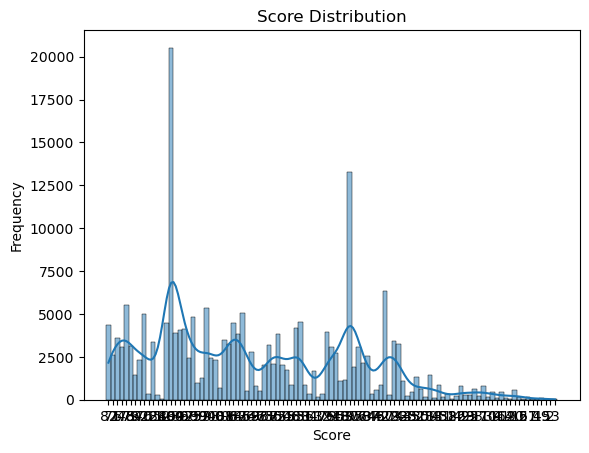

In [153]:
sns.histplot(reporte_studentAssessment_df['score'], bins=30, kde=True)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_9968\1845834889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=reporte_studentAssessment_df, palette='Set2')


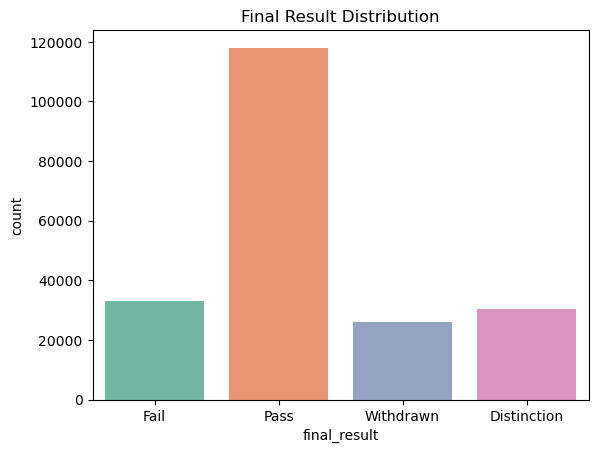

In [155]:
sns.countplot(x='final_result', data=reporte_studentAssessment_df, palette='Set2')
plt.title("Final Result Distribution")
plt.show()

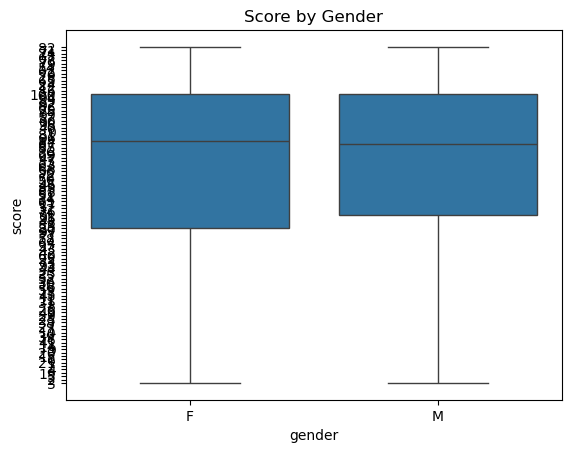

In [159]:
sns.boxplot(x='gender', y='score', data=reporte_studentAssessment_df)
plt.title("Score by Gender")
plt.show()

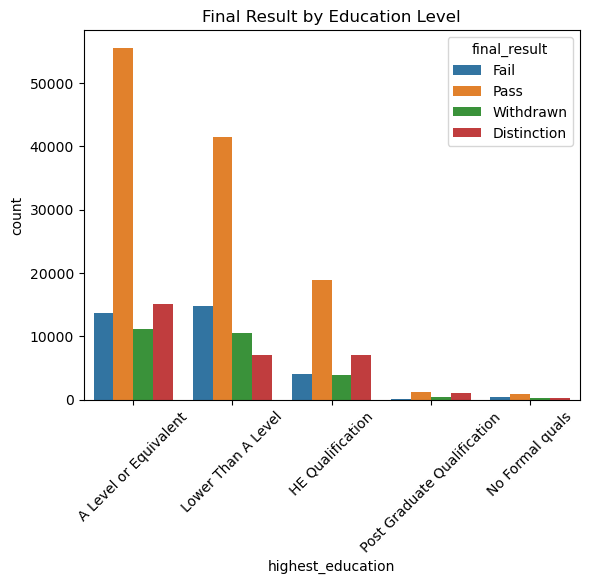

In [161]:
sns.countplot(x='highest_education', hue='final_result', data=reporte_studentAssessment_df)
plt.title("Final Result by Education Level")
plt.xticks(rotation=45)
plt.show()

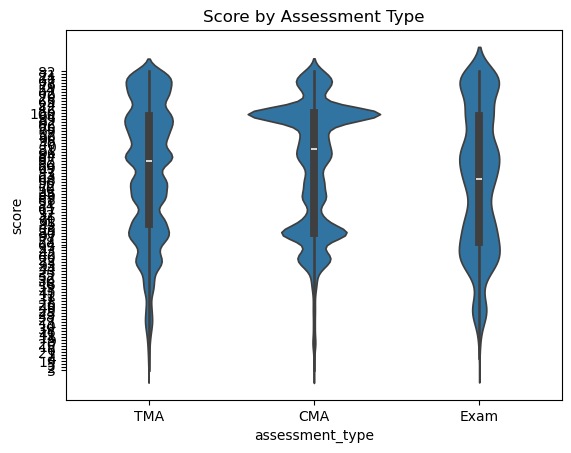

In [163]:
sns.violinplot(x='assessment_type', y='score', data=reporte_studentAssessment_df)
plt.title("Score by Assessment Type")
plt.show()

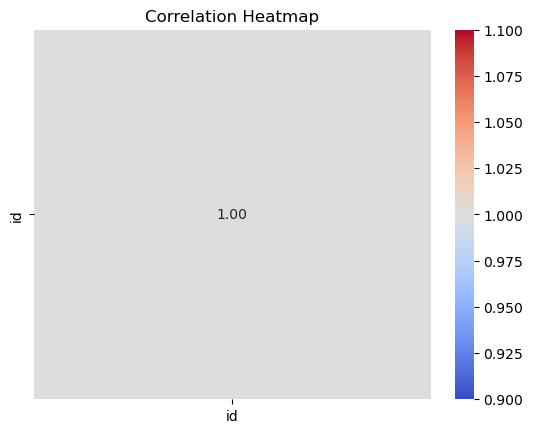

In [165]:
numeric_df = reporte_studentAssessment_df.select_dtypes(include='number')
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<h3>Conclusion</h3>
<ul>
    <li>La distribución de las calificaciones (score) está sesgada hacia valores medios-altos.</li>
    <li>Los resultados finales están dominados por "Pass" y "Distinction", aunque hay proporciones importantes de "Fail" y "Withdrawn".</li>
    <li>Variables como el género y el nivel educativo más alto tienen relación con el rendimiento: los estudiantes con mayor educación previa tienden a obtener mejores resultados.</li>
    <li>El tipo de evaluación (assessment_type) afecta el desempeño: los "TMA" y "Exam" presentan distribuciones distintas de notas.</li>
    <li>Hay correlaciones relevantes entre score, date_submitted y weight.</li>
    <li>Características demográficas como la región, la edad y la discapacidad muestran diferencias sutiles pero significativas en los resultados académicos.</li>
</ul>


#### Reporte StudentVle

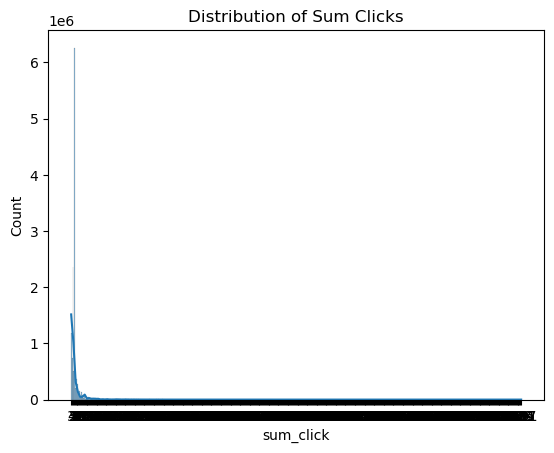

In [178]:
sns.histplot(reporte_studentVle_df['sum_click'], bins=100, kde=True)
plt.title("Distribution of Sum Clicks")
plt.xlabel("sum_click")
plt.show()

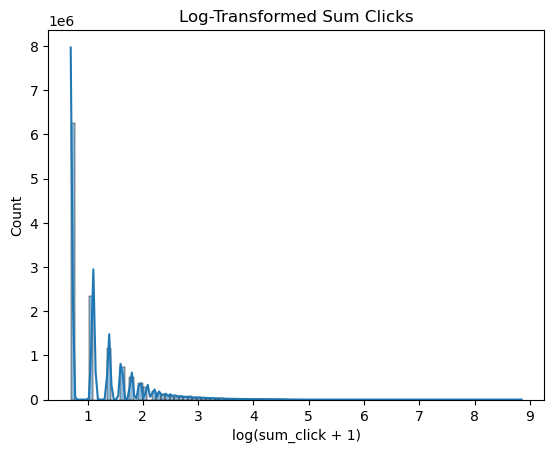

In [188]:
# Convert sum_click to numeric, forcing errors to NaN
reporte_studentVle_df['sum_click'] = pd.to_numeric(reporte_studentVle_df['sum_click'], errors='coerce')

# Now apply log1p safely
sns.histplot(np.log1p(reporte_studentVle_df['sum_click']), bins=100, kde=True)
plt.title("Log-Transformed Sum Clicks")
plt.xlabel("log(sum_click + 1)")
plt.show()

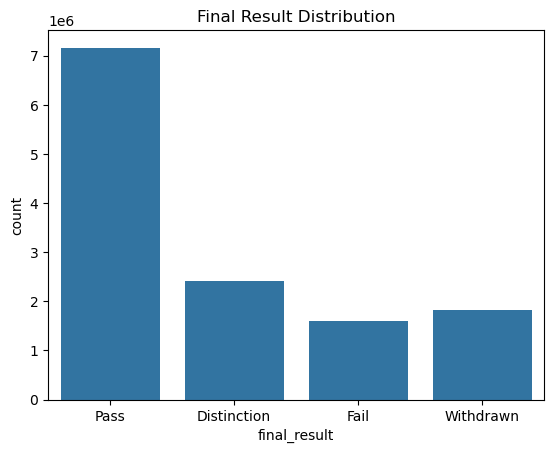

In [189]:
sns.countplot(x='final_result', data=reporte_studentVle_df)
plt.title("Final Result Distribution")
plt.show()

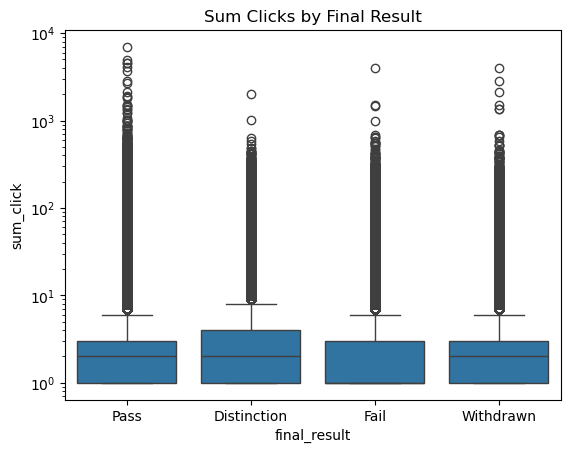

In [190]:
sns.boxplot(x='final_result', y='sum_click', data=reporte_studentVle_df)
plt.title("Sum Clicks by Final Result")
plt.yscale('log')  # Normalize the skew
plt.show()

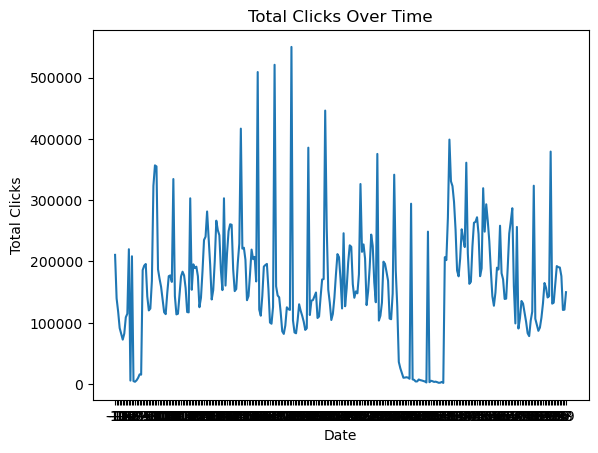

In [191]:
daily_clicks = reporte_studentVle_df.groupby('date')['sum_click'].sum().reset_index()

sns.lineplot(x='date', y='sum_click', data=daily_clicks)
plt.title("Total Clicks Over Time")
plt.xlabel("Date")
plt.ylabel("Total Clicks")
plt.show()

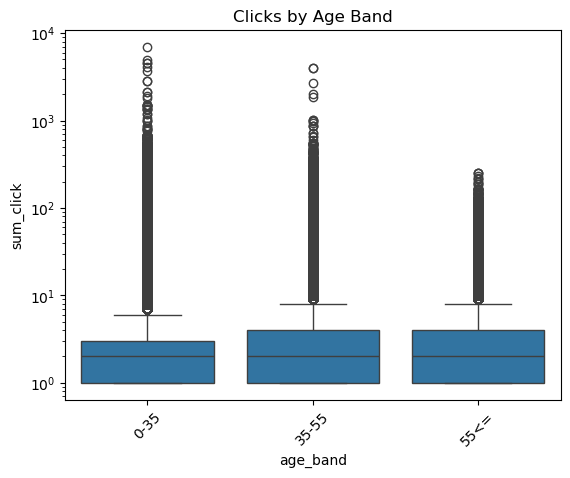

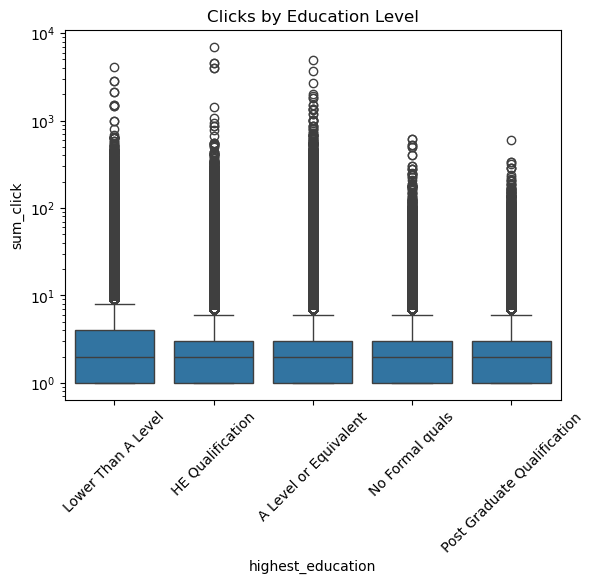

In [192]:
sns.boxplot(x='age_band', y='sum_click', data=reporte_studentVle_df)
plt.yscale('log')
plt.title("Clicks by Age Band")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='highest_education', y='sum_click', data=reporte_studentVle_df)
plt.yscale('log')
plt.title("Clicks by Education Level")
plt.xticks(rotation=45)
plt.show()

<h3>Conclusion</h3>
<ul>
    <li>La variable sum_click tiene una distribución altamente sesgada: la mayoría de los estudiantes realiza pocos clics, y pocos hacen muchos.</li>
    <li>Existe una relación positiva entre mayor número de clics y resultados como "Pass" o "Distinction".</li>
    <li>Aplicar una transformación logarítmica mejora la visualización de sum_click debido a su fuerte asimetría.</li>
    <li>La actividad por fecha muestra picos de clics en momentos clave, probablemente cercanos a entregas o exámenes.</li>
    <li>Grupos como estudiantes con discapacidad, diferentes bandas de edad o niveles educativos muestran comportamientos distintos de interacción.</li>
    <li>Aunque más clics no garantizan el éxito, sí existe una tendencia positiva entre el compromiso en línea y el rendimiento académico.</li>
    <li>Debido al tamaño del conjunto, es recomendable trabajar con muestras para visualizaciones más complejas.</li>
</ul>

#### Reporte Studentinfo_ord

C:\Users\micha\AppData\Local\Temp\ipykernel_9968\1108922881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=reporte_studentinfo_ord_df, palette='Set2')


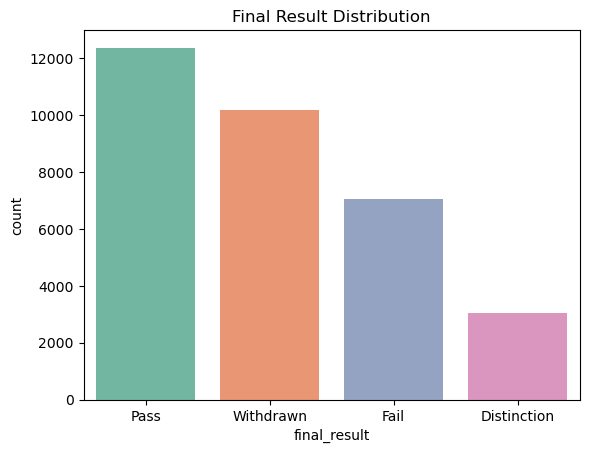

In [198]:
sns.countplot(x='final_result', data=reporte_studentinfo_ord_df, palette='Set2')
plt.title("Final Result Distribution")
plt.show()

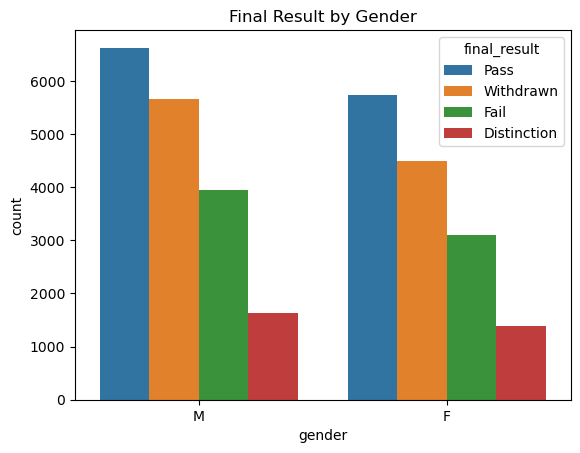

In [200]:
sns.countplot(x='gender', hue='final_result', data=reporte_studentinfo_ord_df)
plt.title("Final Result by Gender")
plt.show()

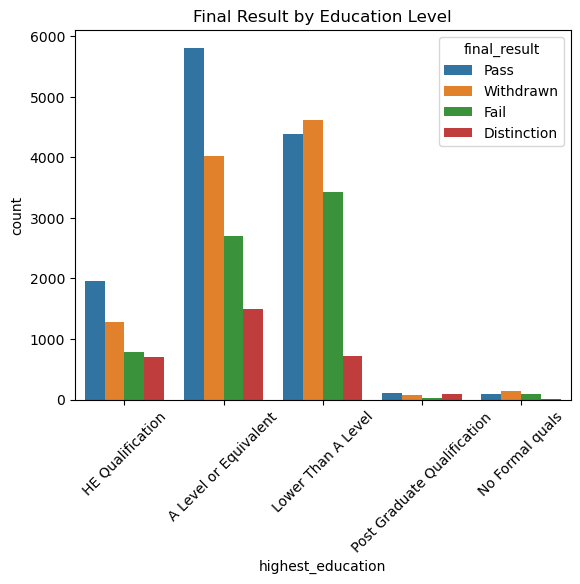

In [202]:
sns.countplot(x='highest_education', hue='final_result', data=reporte_studentinfo_ord_df)
plt.title("Final Result by Education Level")
plt.xticks(rotation=45)
plt.show()

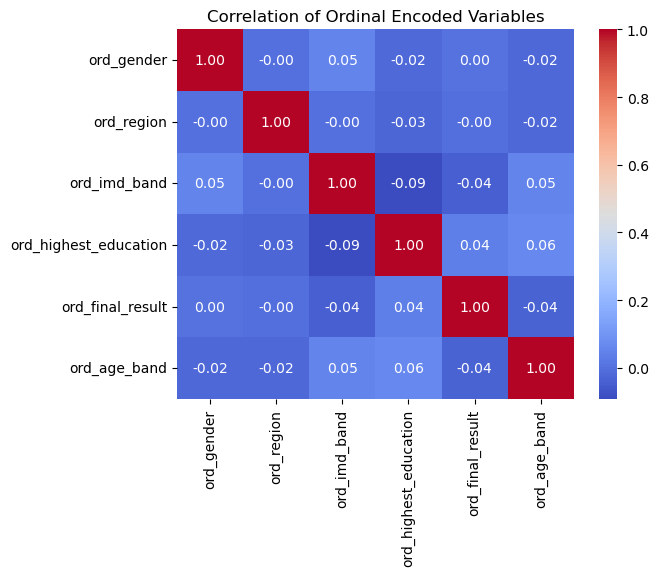

In [204]:
# Only ordinal columns
ordinal_cols = [col for col in reporte_studentinfo_ord_df.columns if col.startswith("ord_")]
corr_ord = reporte_studentinfo_ord_df[ordinal_cols].corr()

sns.heatmap(corr_ord, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Ordinal Encoded Variables")
plt.show()

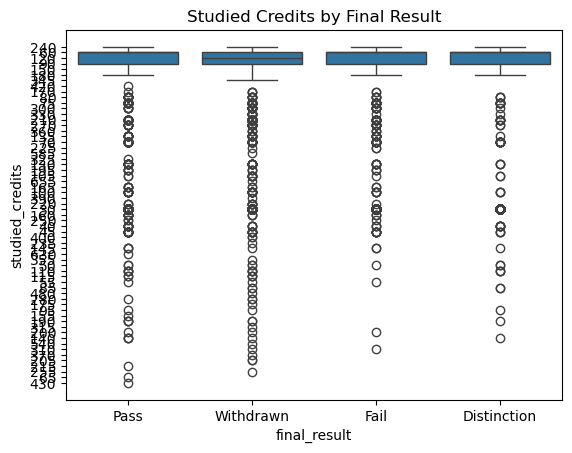

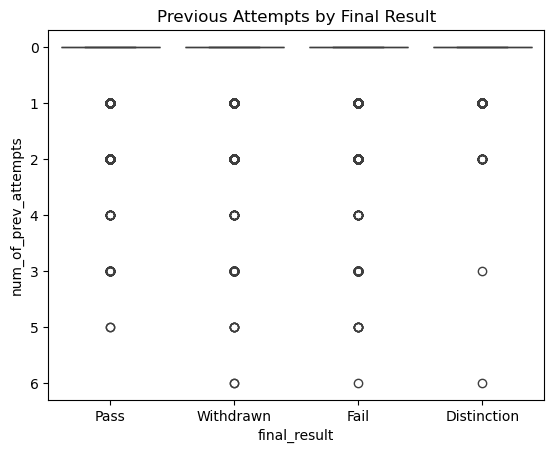

In [206]:
# Boxplot of credits studied vs final result
sns.boxplot(x='final_result', y='studied_credits', data=reporte_studentinfo_ord_df)
plt.title("Studied Credits by Final Result")
plt.show()

# Previous attempts by result
sns.boxplot(x='final_result', y='num_of_prev_attempts', data=reporte_studentinfo_ord_df)
plt.title("Previous Attempts by Final Result")
plt.show()

<h3>Conclusion</h3>
<ul>
    <li>La distribución de final_result es similar a los otros conjuntos: predominan "Pass" y "Withdrawn".</li>
    <li>Variables como créditos estudiados y número de intentos previos son indicadores útiles: más créditos y menos intentos suelen asociarse con mejores resultados.</li>
    <li>Las variables codificadas ordinalmente permiten realizar análisis de correlación y modelos predictivos de forma eficiente.</li>
    <li>Se observan mejores resultados en estudiantes con mayor nivel educativo previo, sin discapacidad, y en edades más jóvenes (por ejemplo, de 0 a 35 años).</li>
    <li>El dataset está limpio, balanceado y listo para análisis más avanzados o para combinar con otros datasets.</li>
</ul>